In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style='whitegrid')

In [2]:
votes_df = pd.read_csv("./data/votes_dataset_clean.csv")
votes_df.head()

,Year,(semi-) final,Jury or Televoting,From country,To country,Points
0,1975,f,J,Belgium,Belgium,0
1,1975,f,J,Belgium,Finland,0
2,1975,f,J,Belgium,France,2
3,1975,f,J,Belgium,Germany,0
4,1975,f,J,Belgium,Ireland,12


In [55]:
# normalize names of the countries
countries_synonyms = {'The Netherlands': 'Netherlands',
                      'Bosnia & Herzegovina': 'Bosnia and Herzegovina',
                      'F.Y.R. Macedonia': 'Macedonia'}
votes_df['From country'] = votes_df['From country']\
   .apply(lambda x: countries_synonyms[x] if x in countries_synonyms else x)
votes_df['To country'] = votes_df['To country']\
   .apply(lambda x: countries_synonyms[x] if x in countries_synonyms else x)

# exclude countries that no longer exist + Australia which has only participated twice
countries_to_exclude = set(['Bosnia', 'Serbia & Montenegro', 'Yugoslavia', 'Australia'])
country_filter = [(votes_df['From country'][i] not in countries_to_exclude) and
                  (votes_df['To country'][i] not in countries_to_exclude)
                  for i in votes_df.index]
votes_df = votes_df[country_filter]

Parameters for selecting data to plot (can be modified):

In [4]:
year_range = (1975, 2016)
finals_only = True

In [5]:
votes_df = votes_df[(votes_df['Year'] >= year_range[0]) & (votes_df['Year'] <= year_range[1])]
if finals_only:
    votes_df = votes_df[votes_df['(semi-) final'] == 'f']

# Filter out televoting for consistency (only in 2016)
votes_df = votes_df[votes_df['Jury or Televoting'] == 'J']

In [6]:
# Number of participating countries each year
data = votes_df[['From country', 'Year']].drop_duplicates().groupby('Year').count()

In [7]:
avg_from_all_by_country_year = votes_df.groupby(['To country', 'Year']).mean().reset_index()
avg_from_all_by_country_year.head()

,To country,Year,Points
0,Albania,2004,2.800000
1,Albania,2005,1.184211
2,Albania,2008,1.279070
3,Albania,2009,1.142857
4,Albania,2010,1.589744


## 1. Points given from one country to another across different years

In [8]:
from_country = 'Ukraine'
to_country = 'Russia'

data = votes_df[(votes_df['From country'] == from_country) 
                & (votes_df['To country'] == to_country) ]
data.head()


,Year,(semi-) final,Jury or Televoting,From country,To country,Points
13693,2003,f,J,Ukraine,Russia,12
14559,2004,f,J,Ukraine,Russia,10
16287,2005,f,J,Ukraine,Russia,4
18175,2006,f,J,Ukraine,Russia,12
20056,2007,f,J,Ukraine,Russia,10


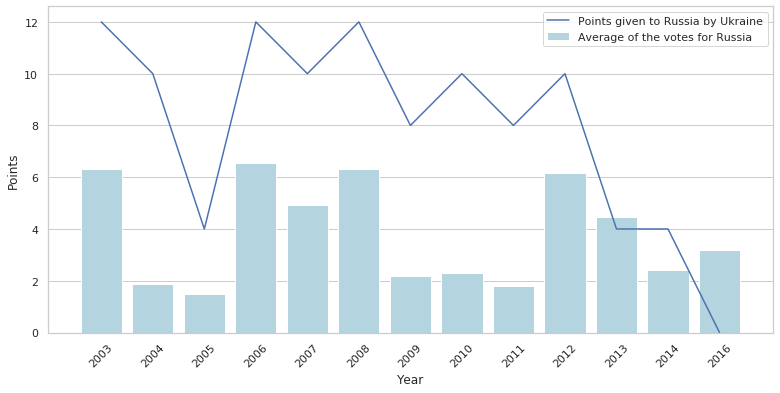

In [9]:
overall_data = avg_from_all_by_country_year[avg_from_all_by_country_year['To country'] == to_country]
year_filter = [y in set(data['Year'].values) for y in overall_data['Year']]
overall_data = overall_data[year_filter]

relevant_year_range = (min(data['Year'].values), max(data['Year'].values))

fig, ax = plt.subplots()

sns.barplot(x="Year", y="Points", ax=ax, data=overall_data, 
            color='lightblue', label='Average of the votes for {}'.format(to_country))
sns.lineplot(x=[i for i in range(len(data))], y=data["Points"], ax=ax,
             label='Points given to {} by {}'.format(to_country, from_country))

plt.gcf().set_size_inches(13, 6)
plt.xticks(rotation=45)
ax.legend()

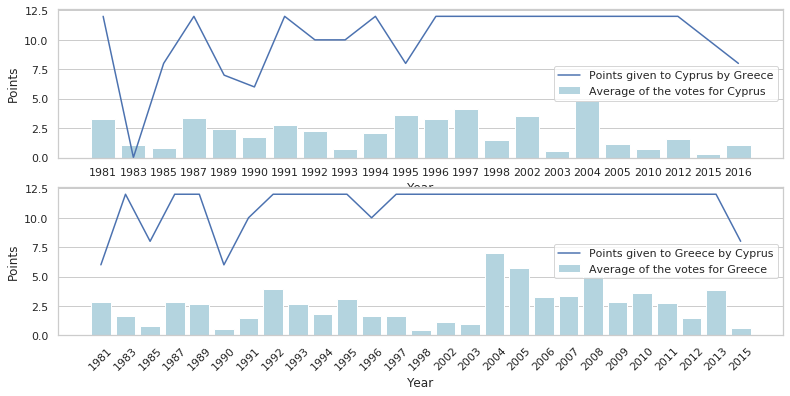

In [10]:
# Two plots, for both directions:

from_country = 'Greece'
to_country = 'Cyprus'

data = votes_df[(votes_df['From country'] == from_country) 
                & (votes_df['To country'] == to_country) ]

overall_data = avg_from_all_by_country_year[avg_from_all_by_country_year['To country'] == to_country]
year_filter = [y in set(data['Year'].values) for y in overall_data['Year']]
overall_data = overall_data[year_filter]


fig, axes = plt.subplots(2, 1)
ax1 = axes[0]
ax2 = axes[1]

sns.barplot(x="Year", y="Points", ax=ax1, data=overall_data, 
            color='lightblue', label='Average of the votes for {}'.format(to_country))
sns.lineplot(x=[i for i in range(len(data))], y=data["Points"], ax=ax1,
             label='Points given to {} by {}'.format(to_country, from_country))
plt.xticks(rotation=45)


# + the other way around
data = votes_df[(votes_df['From country'] == to_country) 
                & (votes_df['To country'] == from_country) ]

overall_data = avg_from_all_by_country_year[avg_from_all_by_country_year['To country'] == from_country]
year_filter = [y in set(data['Year'].values) for y in overall_data['Year']]
overall_data = overall_data[year_filter]

sns.barplot(x="Year", y="Points", ax=ax2, data=overall_data, 
            color='lightblue', label='Average of the votes for {}'.format(from_country))
sns.lineplot(x=[i for i in range(len(data))], y=data["Points"], ax=ax2,
             label='Points given to {} by {}'.format(from_country, to_country))

plt.gcf().set_size_inches(13, 6)
plt.xticks(rotation=45)
ax1.legend()
ax2.legend()


## 2. Average votes for other countries from a specified country

In [11]:
from_country = 'Russia'

data = votes_df[votes_df['From country'] == from_country][['Year', 'To country', 'Points']]\
    .sort_values('To country')  # alphabetical order
relevant_year_range = (min(data['Year'].values), max(data['Year'].values))
data.head()

,Year,To country,Points
25684,2010,Albania,0
29294,2012,Albania,0
23931,2009,Albania,0
22064,2008,Albania,0
33586,2015,Albania,0


Text(0.5, 1.0, 'Average points given to other countries by Russia during 1994-2016')

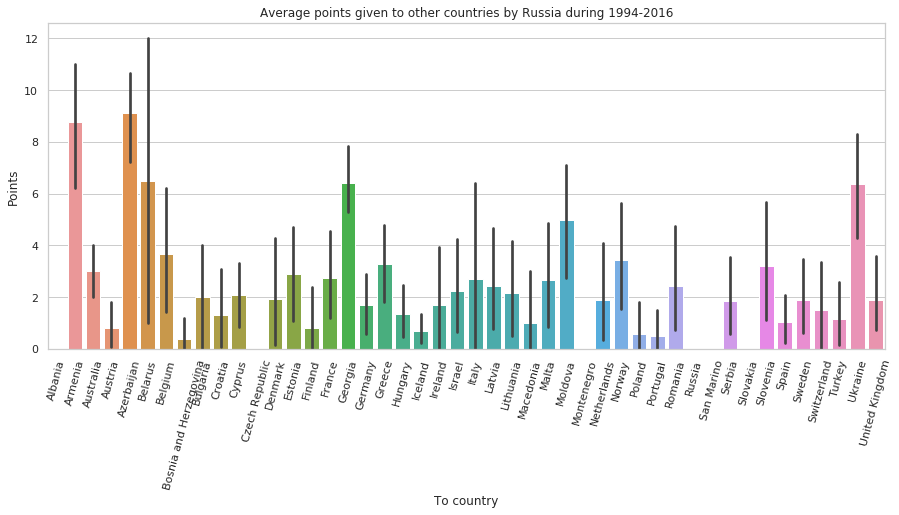

In [12]:
plt.gcf().set_size_inches(15, 6)
plt.xticks(rotation=75)
ax = sns.barplot(x="To country", y="Points", data=data)
ax.set_title('Average points given to other countries by {} during {}-{}'.format(from_country, 
                                                                                 relevant_year_range[0],
                                                                                 relevant_year_range[1]))

## 3. Same, but to_country

Text(0.5, 1.0, 'Average points given by other countries to Sweden during 1975-2016')

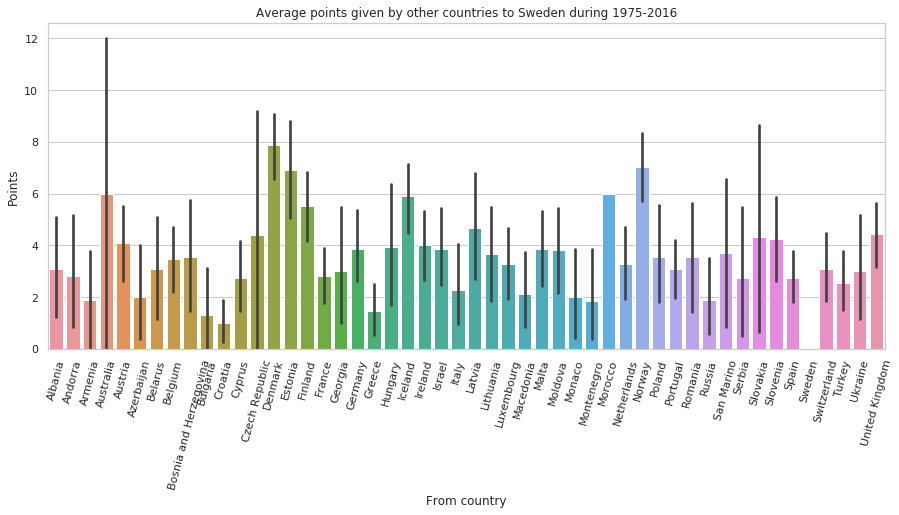

In [13]:
to_country = 'Sweden'

data = votes_df[votes_df['To country'] == to_country][['Year', 'From country', 'Points']]\
    .sort_values('From country')  # alphabetical order
relevant_year_range = (min(data['Year'].values), max(data['Year'].values))

plt.gcf().set_size_inches(15, 6)
plt.xticks(rotation=75)
ax = sns.barplot(x="From country", y="Points", data=data)

ax.set_title('Average points given by other countries to {} during {}-{}'.format(to_country, 
                                                                                 relevant_year_range[0],
                                                                                 relevant_year_range[1]))

## 4. Cluster map

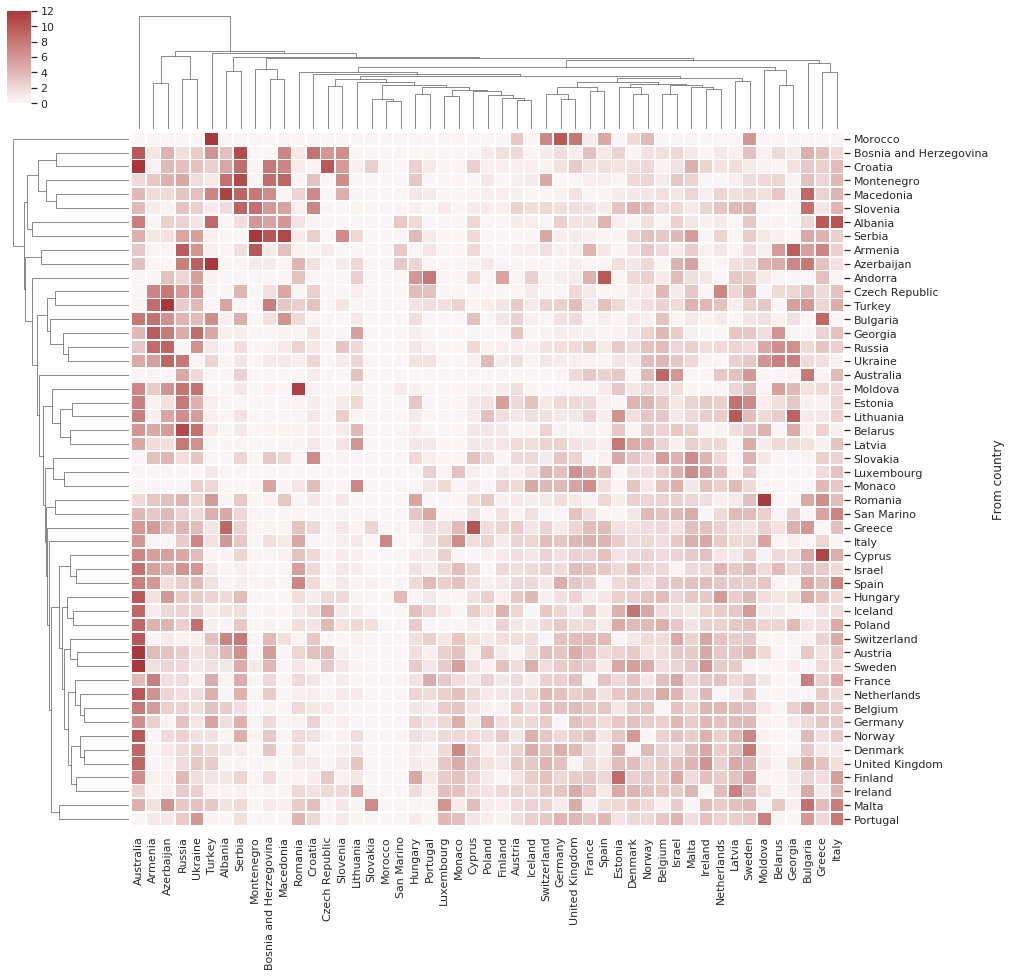

In [14]:
avg_votes_by_countries_pairs = votes_df\
                                [['From country', 'To country', 'Points']]\
                                .groupby(['From country', 'To country']).mean().unstack('To country')
# Reset multiple column levels
avg_votes_by_countries_pairs.columns = [country for _, country in avg_votes_by_countries_pairs.columns]

# Note: note entirely accurate because of years when some countries have not particpated
avg_votes_by_countries_pairs = avg_votes_by_countries_pairs.fillna(value=0)


# Draw the full plot
sns.clustermap(avg_votes_by_countries_pairs, center=0, cmap="vlag",
               #row_cluster=False, col_cluster=False,
               linewidths=.75, figsize=(15, 15))

## Map

In [15]:
!pip3 install plotly
import plotly.graph_objects as go

  Using cached https://files.pythonhosted.org/packages/e3/67/eb2b2be7a63a66548abea92447fc04d9abf363520f1af6145c5f033cd1b3/plotly-4.3.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/65/26/32b8464df2a97e6dd1b656ed26b2c194606c16fe163c695a992b36c11cdf/six-1.13.0-py2.py3-none-any.whl


In [56]:
# Include countries codes in the dataset - we will need them to
# create choropleth maps
code_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
country_to_code_dict = {country: code for country, code in zip(code_df['COUNTRY'], code_df['CODE'])}

from_codes = [country_to_code_dict[country] for country in votes_df['From country']]
to_codes = [country_to_code_dict[country] for country in votes_df['To country']]
votes_df['from_country_code'] = from_codes
votes_df['to_country_code'] = to_codes
votes_df.head()

,Year,(semi-) final,Jury or Televoting,From country,To country,Points,from_country_code,to_country_code
0,1975,f,J,Belgium,Belgium,0,BEL,BEL
1,1975,f,J,Belgium,Finland,0,BEL,FIN
2,1975,f,J,Belgium,France,2,BEL,FRA
3,1975,f,J,Belgium,Germany,0,BEL,DEU
4,1975,f,J,Belgium,Ireland,12,BEL,IRL


In [57]:
# votes_df.to_csv('./data/votes_with_countries_codes.csv', index=False)
# df = pd.read_csv('./data/votes_with_countries_codes.csv')

In [58]:
# Dataframe with the average amount of points each country was getting
# across the years it has participated
avg_from_all_by_country = votes_df.groupby(['To country']).mean().reset_index()[['To country', 'Points']]
avg_from_all_by_country['Points'] = avg_from_all_by_country['Points'].apply(lambda x: round(x, 1))

codes = [country_to_code_dict[country] for country in avg_from_all_by_country['To country']]
avg_from_all_by_country['Code'] = codes
avg_from_all_by_country.head()

,To country,Points,Code
0,Albania,1.8,ALB
1,Armenia,3.0,ARM
2,Austria,1.9,AUT
3,Azerbaijan,3.3,AZE
4,Belarus,1.6,BLR


In [59]:
df = avg_from_all_by_country

In [133]:
fig = go.Figure(data=go.Choropleth(
    locations = df['Code'],
    z = df['Points'],
    text = df['To country'],
    colorscale = 'Blues',
    autocolorscale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
))

fig.update_layout(
    title_text='Average points got by each country',
    geo=dict(
        # scope='europe',
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
)

fig.show()

In [134]:
coords = pd.read_csv('./data/countries_coordinates.csv')

country_to_coord_dict = {country: (lat, lon) for country, lat, lon 
                         in zip(coords['name'], coords['latitude'], coords['longitude'])}

In [135]:
avg_votes_by_countries_pairs = votes_df\
                                [['From country', 'To country', 'Points']]\
                                .groupby(['From country', 'To country']).mean().reset_index()

avg_votes_by_countries_pairs['Points'] = avg_votes_by_countries_pairs['Points'].apply(lambda x: round(x, 1))

# Filter out pairs of countries with avg points < threshold to show
threshold = 7.5
avg_votes_by_countries_pairs = avg_votes_by_countries_pairs\
            [avg_votes_by_countries_pairs['Points'] >= threshold].reset_index(drop=True)

avg_votes_by_countries_pairs.head()
len(avg_votes_by_countries_pairs)

73

In [136]:
for i in range(len(avg_votes_by_countries_pairs)):
    from_country = avg_votes_by_countries_pairs['From country'][i]
    to_country = avg_votes_by_countries_pairs['To country'][i]
    points = avg_votes_by_countries_pairs['Points'][i]
    
    fig.add_trace(
        go.Scattergeo(
            lat = [country_to_coord_dict[from_country][0], country_to_coord_dict[to_country][0]],
            lon = [country_to_coord_dict[from_country][1], country_to_coord_dict[to_country][1]],
            hoverinfo = 'text',
            text = from_country + ' to ' + to_country + ': ' + str(points),
            mode = 'lines',
            line = dict(width = points - threshold,
                        color = 'red'),
            #opacity = (points - threshold) / (12 - threshold),
        )
    )

fig.update_layout(
    title_text='Votes between countries',
    showlegend = False,
)

fig.show()